## Problem Statement

  Then:
-  read the file carefully

-  add comments to all the cells carefully, explaining exactly what that cell does

-  in the cell where the main model is defined:

-  write receptive field of each layer as a comment

-  write the input channel dimensions

-  run each cell one by one

-  add a new cell at the end of the file, explaining what (according to you) all is wrong with the network?

-  Once the model is trained for 10 epochs, mode the file to your Session 2 repository on your GitHub

-  Upload the Github link the submission section (do not forget to add theschoolofai as a collaborator)

-  50% score for running all the cells, and 50% for your documentation (comments that you'll add)

## Installing necessary Python Packages

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## Import the required packages. Load the required packages in to the memory.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

## Load the Mnist data and store the data in the respective variables.
- #### Mnist data : Is a dataset which stores hand written digits in different formats
- Mnist data is stored in keras.datasets.
- Load the Mnist dataset by using load_data() function
- The dataset has train set and test test. 
- Train set has input data and actual output data. 
- Input_data for each record is stored in X_train and actual output is stored in y_train
- X_train : array of number for each digit   
- y_train : is actual digit value
- Test set has X_test and y_test.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Size of Train Dataset and plot the first number on the graph
- The train dataset has input data which is stored in X_train
- X_train is an 3 dimensinal array which is storing 60 thousand numbers. Each number is of 28 x 28 of size i.e 28 rows and 28 columns

### Now plot the first number
- Among the 60000 thousand number fetch the frist number by calling X_train[0]
- the first number has 28 rows and 28 columns.
- plot the first number matplotlib. this is the library used to plot graphs
- plt.imshow function helps to show the graph on the screen

In [4]:
X_train.ndim

3

In [5]:
X_train.shape[0]

60000

In [6]:
X_train[0].shape



(28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

(60000, 28, 28)


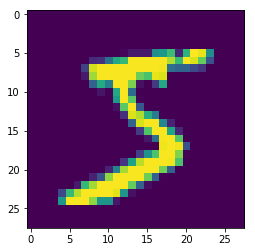

In [8]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Reshape the 3 dimensional array to 4 dimensional Array



In [9]:
X_train.shape[0]

60000

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_train[0].shape

(28, 28, 1)

In [13]:
X_train.ndim

4

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## conv2D    

keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

## Default value for padding = 'valid'  , that means no padding

## Input size ie each number is of size 28 x 28  (28 rows 28 columns) , one layer

In [23]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))     # result :26, 26, 32    each kernel size : 3x3 , No of Kernels : 32 
model.add(Convolution2D(64, 3, 3, activation='relu'))                            # result :24, 24, 64    each kernel size : 3x3,32 layers , No of Kernels : 63
model.add(Convolution2D(128, 3, 3, activation='relu'))                           # result :22, 22, 128   each kernel size : 3x3, 63 layers , No of kernels : 128

model.add(MaxPooling2D(pool_size=(2, 2)))                                        # result :11, 11, 128   max pool size (2x2) - output rows and columns reduced to half

model.add(Convolution2D(256, 3, 3, activation='relu'))                           # result : 9, 9, 256  each kernel size : 3x3, 128 layers, No of Kernels : 256
model.add(Convolution2D(512, 3, 3, activation='relu'))                           # result : 7, 7, 512    each kernel size : 3x3, 256 layers, No of Kernels : 512
model.add(Convolution2D(1024, 3, 3, activation='relu'))                          # result : 5, 5, 1024   each kernel size : 3x3, 512 layers, No of kernels : 1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))                          # result : 3, 3, 2048   each kernel size : 3x3, 1024 layers, No of kernels : 1024
model.add(Convolution2D(10, 3, 3, activation='relu'))                            # result : 1, 1, 10     each kernel size : 3x3, 2048 layers. No of kernels : 10

model.add(Flatten())                                                             # result : list of 10 numbers
model.add(Activation( 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 5, 5, 1024)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

## Compiling the model 

- mentioning which Optimizer algorithm to be used to calculate the gradients

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [35]:
X_train[0].shape, y_train[0]

((28, 28, 1), 5)

## Train the Model

- Pass the input data X_train
- Pass the output data y_Train
- Batch_size - 32. Each epoch is to cover all images one time. To do that the images goes in batches. For one epoch there will be multiple batches. Each batch will take 32 images.

- nb_epoch = 10. Train the model for 10 epochs

- Verbose - show the training log history for every epoch.

In [0]:
model.fit(X_train, y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: ignored

# Validate/ Test the Model

- After the model is trained we test the model by checking the predictions with y_test values. 
- Accuracy score is calculates by checking how many predictions are correct

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

ValueError: ignored

# Print the Accuracy Score

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

## For 9th number in the test dataset check what the model prediction  and what is the actual value

In [0]:
print(y_pred[:9])
print(y_test[:9])

# Observations:

- #### Convolution2D can be replaced with new API Conv2D

- #### This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 100 nodes.

- #### The last layers need to have fully connected layers /Dense Layers which is missing in the model

- #### The final prection will be prediction one of 10 classes. The 10 classes are (0, 1, 2, 3, 4, 5, ,6 ,7 8, 9)
- #### The final prediction should give the confidence value for each class. For example the confidence value of 9 is big the predicted value would be 9

# Questions:

- ### 1. It would help if you can explain categorical_crossentropy, I could not understand this logic. 